# **Predicting Housing Prices**

In this lab, I am going to extract the profit data for Tesla and 
GameStop and compare the price of the stock vs the profit for the hedge fund. Thus, I will use Pandas and yfinance (yahoo finance) libraries. yfinance offers a threaded and Pythonic way to download market data from Yahoo. Let's use it.

**Step 1: Installing dependencies**

In [1]:
!pip install -q -U watermark

     |████████████████████████████████| 1.6 MB 5.4 MB/s 


In [2]:
%reload_ext watermark
%watermark -v -p numpy,pandas,scipy,seaborn,sklearn,matplotlib

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 7.9.0

numpy     : 1.21.6
pandas    : 1.3.5
scipy     : 1.7.3
seaborn   : 0.11.2
sklearn   : 1.0.2
matplotlib: 3.2.2



**Step 2: Importing libs**

In [3]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
#%matplotlib inline 
from scipy import stats

**Step 3: Data Acquisition**


Our dataset contains housing prices information and its format is .csv.  The data is hosted on Kaggle and created by DanB, Alexis Cook, Ryan Holbrook:

>https://www.kaggle.com/code/dansbecker/your-first-machine-learning-model/data?select=train.csv

 I've uploaded the dataset to Google Drive. Let's get it:

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!ls '/content/gdrive'

MyDrive


In [6]:
df = pd.read_csv('/content/gdrive/MyDrive/HousingPrices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We can check the bottom 10 rows of data frame "df".

In [7]:
df.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Some values in the table above show as **"NaN"**. This is because those numbers are not available regarding a particular column type.

**Step 4: Add Headers**


Sometimes our date does not have appropriate headers or Pandas automatically set the header with an integer starting from 0. We can introduce a header to better describe our data. 
Thus, we have to add headers manually.

First, we create a list "headers" that include all column names in order. Then, we use dataframe.columns = headers to replace the headers with the list we created.

(***Note:***
Our data already has suitable headers and it is just an example.)

In [8]:
# create headers list
#headers = ["header1","header2","header3","header4","header5", "header6","header7",
#         "header8","header9","header11", "header12","header13","header14","header15","header16"]
#print("headers\n", headers)

We can replace headers and recheck our dataframe:

In [9]:
#df.columns = headers
#df.head(10)

We can find the name of the columns of the dataframe.

In [10]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**Step 5: Describe**

If we would like to get a statistical summary of each column e.g. count, column mean value, column standard deviation, etc., we can use the describe method:

In [11]:
df=df.drop(["Id"], axis=1)
df.describe(include = "all")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


You can select the columns of a dataframe by indicating the name of each column.

In [12]:
df[['MSSubClass', 'SalePrice']].describe()

,MSSubClass,SalePrice
count,1460.000000,1460.000000
mean,56.897260,180921.195890
std,42.300571,79442.502883
min,20.000000,34900.000000
25%,20.000000,129975.000000
50%,50.000000,163000.000000
75%,70.000000,214000.000000
max,190.000000,755000.000000


**Step 6: Findig Missing Values**

We must replace the "?" symbol with NaN so the dropna() can remove the missing values:

In [13]:
df.replace("?", np.NAN, inplace = True)

We use the following functions to identify these missing values. 


***NOTE:***
"True" means the value is a missing value while "False" means the value is not a missing value.

In [14]:
missing_data = df.isnull()
missing_data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
7,False,False,True,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
9,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


We can **count** *missing values* in each column. As I already mentioned, "True" represents a missing value and "False" means the value is present in the dataset.

In [15]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

MSSubClass
False    1460
Name: MSSubClass, dtype: int64

MSZoning
False    1460
Name: MSZoning, dtype: int64

LotFrontage
False    1201
True      259
Name: LotFrontage, dtype: int64

LotArea
False    1460
Name: LotArea, dtype: int64

Street
False    1460
Name: Street, dtype: int64

Alley
True     1369
False      91
Name: Alley, dtype: int64

LotShape
False    1460
Name: LotShape, dtype: int64

LandContour
False    1460
Name: LandContour, dtype: int64

Utilities
False    1460
Name: Utilities, dtype: int64

LotConfig
False    1460
Name: LotConfig, dtype: int64

LandSlope
False    1460
Name: LandSlope, dtype: int64

Neighborhood
False    1460
Name: Neighborhood, dtype: int64

Condition1
False    1460
Name: Condition1, dtype: int64

Condition2
False    1460
Name: Condition2, dtype: int64

BldgType
False    1460
Name: BldgType, dtype: int64

HouseStyle
False    1460
Name: HouseStyle, dtype: int64

OverallQual
False    1460
Name: OverallQual, dtype: int64

OverallCond
False    1460
Name: Ove

Based on the summary above, each column has 1460 rows of data and seven of the columns containing missing data:


- "LotFrontage": 259 missing data
- "Alley": 91 missing data
- "MasVnrType": 8 missing data
- "MasVnrArea": 8 missing data
- "BsmtCond": 37 missing data
- "BsmtQual": 37 missing data
- "BsmtCond": 37 missing data
- BsmtExposure": 38 missing data
- "BsmtFinType1": 37 missing data
- "BsmtFinType2": 38 missing data
- "Electrical": 1 missing data
- "FireplaceQu": 690 missing data
- "GarageType": 81 missing data
- "GarageYrBlt": 81 missing data
- "GarageFinish": 81 missing data
- "GarageQual": 81 missing data
- "GarageCond" : 81 missing data
- "PoolQC": 7 missing data
- "Fence": 281 missing data
- "MiscFeature": 54 missing data

**Step 7: Dealing with missing data**

We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. I will apply each method to many different columns:


**Replace by frequency:**

- "MasVnrType": 8 missing data,replace them with frequency
- "Electrical": 1 missing data, replace them with frequency
- "PoolQC": 7 missing data, replace them with frequency
- "Fence": 281 missing data, replace them with frequency
- "Alley": 91 missing data, replace them with frequency
- "BsmtCond": 37 missing data, replace them with frequency
- "BsmtQual": 37 missing data, replace them with frequency
- "BsmtCond": 37 missing data, replace them with frequency
- BsmtExposure": 38 missing data, replace them with frequency
- "BsmtFinType1": 37 missing data, replace them with frequency
- "BsmtFinType2": 38 missing data, replace them with frequency
- "GarageType": 81 missing data, replace them with frequency
- "GarageFinish": 81 missing data, replace them with frequency
- "GarageQual": 81 missing data, replace them with frequency
- "GarageCond" : 81 missing data, replace them with frequency
- "MiscFeature": 54 missing data, replace them with frequency
- "FireplaceQu": 690 missing data, replace them with frequency



---


**Replace by mean:**
- "LotFrontage": 259 missing data, replace them with mean
- "MasVnrArea": 8 missing data, replace them with mean
- "GarageYrBlt": 81 missing data, replace them with mean




We can calculate the **mean** value for the specific columns.

In [16]:
avg_LotFrontage=df['LotFrontage'].astype('float').mean(axis=0)
print("Average of LotFrontage:", avg_LotFrontage)

avg_MasVnrArea=df['MasVnrArea'].astype('float').mean(axis=0)
print("Average of MasVnrArea:", avg_MasVnrArea)

avg_GarageYrBlt=df['GarageYrBlt'].astype('float').mean(axis=0)
print("Average of GarageYrBlt:", avg_GarageYrBlt)

Average of LotFrontage: 70.04995836802665
Average of MasVnrArea: 103.68526170798899
Average of GarageYrBlt: 1978.5061638868744


In [17]:
df['LotFrontage'].replace(np.NAN, avg_LotFrontage, inplace=True)

df['MasVnrArea'].replace(np.NAN, avg_MasVnrArea, inplace=True)

df['GarageYrBlt'].replace(np.NAN, avg_GarageYrBlt, inplace=True)

We can calculate the **Frequency** value for the specific columns based on two steps:
 1- To see which values are present in a particular column, we can use the ".value_counts()" method or We can also use the ".idxmax()" method to calculate the most common type automatically. 
 2- replacing new values. 

In [18]:
#MasVnrType
df['MasVnrType'].value_counts()

            #or

#df['MasVnrType'].value_counts().idxmax()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [19]:
#replace the missing 'MasVnrType' values by the most frequent 
df["MasVnrType"].replace(np.NAN, "None", inplace=True)

In [20]:
#Electrical
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [21]:
df["Electrical"].replace(np.NAN, "SBrkr", inplace=True)

In [22]:
#PoolQC
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [23]:
df["PoolQC"].replace(np.NAN, "Gd", inplace=True)

In [24]:
#Fence
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [25]:
df["Fence"].replace(np.NAN, "MnPrv", inplace=True)

In [26]:
#Alley
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [27]:
df["Alley"].replace(np.NAN, "Grvl", inplace=True)

In [28]:
#BsmtCond
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [29]:
df["BsmtCond"].replace(np.NAN, "TA", inplace=True)

In [30]:
#BsmtQual
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [31]:
df["BsmtQual"].replace(np.NAN, "TA", inplace=True)

In [32]:
#BsmtCond
df['BsmtCond'].value_counts()

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [33]:
df["BsmtCond"].replace(np.NAN, "TA", inplace=True)

In [34]:
#BsmtExposure
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [35]:
df["BsmtExposure"].replace(np.NAN, "NO", inplace=True)

In [36]:
#BsmtFinType1
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [37]:
df["BsmtFinType1"].replace(np.NAN, "Unf", inplace=True)

In [38]:
#BsmtFinType2
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [39]:
df["BsmtFinType2"].replace(np.NAN, "Unf", inplace=True)

In [40]:
#GarageType
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [41]:
df["GarageType"].replace(np.NAN, "Attchd", inplace=True)

In [42]:
#GarageFinish
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [43]:
df["GarageFinish"].replace(np.NAN, "Unf", inplace=True)

In [44]:
#GarageQual
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [45]:
df["GarageQual"].replace(np.NAN, "TA", inplace=True)

In [46]:
#GarageCond
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [47]:
df["GarageCond"].replace(np.NAN, "TA", inplace=True)

In [48]:
#MiscFeature
df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [49]:
df["MiscFeature"].replace(np.NAN, "Shed", inplace=True)

In [50]:
#FireplaceQu
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [51]:
df["FireplaceQu"].replace(np.NAN, "Gd", inplace=True)

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.


---



**NOTE:**  simply drop whole row with NaN in a column: 

In [52]:
#df.dropna(subset=["COLUMN"], axis=0, inplace=True)
#df.reset_index(drop=True, inplace=True)

In [53]:
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000000,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.000000,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.000000,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.000000,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000000,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
5,50,RL,85.000000,14115,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.000000,10084,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,307000
7,60,RL,70.049958,10382,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.000000,6120,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,4,2008,WD,Abnorml,129900
9,190,RL,50.000000,7420,Pave,Grvl,Reg,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,1,2008,WD,Normal,118000


# **GREET JOB!**
***Now, we have a dataset with no missing values.***

**Step 8: Correcting data format**



We need to checke that all data is in the correct format (int, float, text or other).
Data has a variety of types. we can know the data type of each column. In Pandas:

In [54]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

Some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.

In [55]:
df[["MasVnrArea", "GarageYrBlt"]] = df[["MasVnrArea", "GarageYrBlt"]].astype("int")
df[["LotArea", "OverallQual"]] = df[["LotArea", "OverallQual"]].astype("int")
df[["OverallCond", "YearBuilt", "YearRemodAdd"]] = df[["OverallCond", "YearBuilt", "YearRemodAdd"]].astype("int")
df[["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"]] = df[["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"]].astype("int")
df[["TotalBsmtSF", "1stFlrSF", "2ndFlrSF"]] = df[["TotalBsmtSF", "1stFlrSF", "2ndFlrSF"]].astype("int")
df[["LowQualFinSF", "GrLivArea"]] = df[["LowQualFinSF", "GrLivArea"]].astype("int")
df[["BsmtFullBath", "BsmtHalfBath", "FullBath"]] = df[["BsmtFullBath", "BsmtHalfBath", "FullBath"]].astype("int")
df[["HalfBath","BedroomAbvGr", "KitchenAbvGr"]] = df[["HalfBath","BedroomAbvGr", "KitchenAbvGr"]].astype("int")
df[["TotRmsAbvGrd", "Fireplaces", "GarageCars"]] = df[["TotRmsAbvGrd", "Fireplaces", "GarageCars"]].astype("int")
df[["GarageArea", "WoodDeckSF", "OpenPorchSF"]] = df[["GarageArea", "WoodDeckSF", "OpenPorchSF"]].astype("int")
df[["EnclosedPorch", "3SsnPorch", "ScreenPorch"]] = df[["EnclosedPorch", "3SsnPorch", "ScreenPorch"]].astype("int")
df[["PoolArea","MiscVal","MoSold", "YrSold"]] = df[["PoolArea","MiscVal","MoSold", "YrSold"]].astype("int")



In [56]:
df[["MasVnrType", "Electrical", "PoolQC"]] = df[["MasVnrType", "Electrical", "PoolQC"]].astype("object")
df[["Fence", "Alley", "BsmtCond", "BsmtQual" ]] = df[["Fence", "Alley", "BsmtCond", "BsmtQual"]].astype("object")
df[["BsmtExposure", "BsmtFinType1", "BsmtFinType2"]] = df[["BsmtExposure", "BsmtFinType1", "BsmtFinType2",]].astype("object")
df[["GarageType", "GarageFinish", "GarageQual"]] = df[["GarageType", "GarageFinish", "GarageQual"]].astype("object")
df[["GarageCond", "MiscFeature", "FireplaceQu"]] = df[["GarageCond", "MiscFeature", "FireplaceQu"]].astype("object")
df[["MSSubClass", "Street", "LotShape"]] = df[["MSSubClass", "Street", "LotShape"]].astype("object")
df[["LandContour", "Utilities", "LotConfig"]] = df[["LandContour", "Utilities", "LotConfig"]].astype("object")
df[["LandSlope", "Neighborhood", "Condition1"]] = df[["LandSlope", "Neighborhood", "Condition1"]].astype("object")
df[["Condition2", "BldgType", "HouseStyle"]] = df[["Condition2", "BldgType", "HouseStyle"]].astype("object")
df[["RoofStyle", "RoofMatl", "Exterior1st"]] = df[["RoofStyle", "RoofMatl", "Exterior1st"]].astype("object")
df[["Exterior2nd", "ExterQual", "ExterCond"]] = df[["Exterior2nd", "ExterQual", "ExterCond"]].astype("object")
df[["Foundation", "Heating", "HeatingQC"]] = df[["Foundation", "Heating", "HeatingQC"]].astype("object")
df[["CentralAir", "KitchenQual","Functional"]] = df[["CentralAir", "KitchenQual","Functional"]].astype("object")
df[["PavedDrive", "SaleType", "SaleCondition"]] = df[["PavedDrive", "SaleType", "SaleCondition"]].astype("object")


In [57]:
df[["SalePrice", "LotFrontage"]] = df[["SalePrice", "LotFrontage"]].astype("float")

We can list the columns after the conversion

In [58]:
df.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 80, dtype: object

**Step 9: Using Dummy Variable**

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

For instance, we can see the column "RoofStyle" has SIX unique values: "Gable", "Hip", "Flat", "Gambrel", "Mansard" or "Shed". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "RoofStyle" to indicator variables.

We will use pandas' method 'get_dummies' to assign numerical values to different categories of 16 various variables including **RoofStyle, Street, Neighborhood, HouseStyle, RoofMatl, Foundation, BsmtQual, Heating, CentralAir, Electrical, PoolQC, Fence, MiscFeature, SaleType, and SaleCondition**.

# *let's go!*

We must get the indicator variables and assign it to data frame "dummy_variable_1":

In [59]:
#dummy_variable_1= RoofStyle
dummy_variable_1 = pd.get_dummies(df['RoofStyle'])
dummy_variable_1.head()


,Flat,Gable,Gambrel,Hip,Mansard,Shed
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


Now we need to change the column names for clarity:

In [60]:
dummy_variable_1.rename(columns={'Flat':'RoofStyle-Flat', 'Gable':'RoofStyle-Gable',
                                 'Gambrel':'RoofStyle-Gambrel', 'Hip':'RoofStyle-Hip',
                                 'Mansard':'RoofStyle-Mansard', 'Shed': 'RoofStyle-Shed'}, inplace=True)
dummy_variable_1.head()

,RoofStyle-Flat,RoofStyle-Gable,RoofStyle-Gambrel,RoofStyle-Hip,RoofStyle-Mansard,RoofStyle-Shed
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In the dataframe, column 'RoofStyle' has values for "Gable", "Hip", "Flat", "Gambrel", "Mansard", and "Shed" as 0s and 1s now.

In [61]:
df = pd.concat([df, dummy_variable_1], axis=1)
 
df.drop("RoofStyle", axis = 1, inplace=True)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,RoofStyle-Flat,RoofStyle-Gable,RoofStyle-Gambrel,RoofStyle-Hip,RoofStyle-Mansard,RoofStyle-Shed
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,2008,WD,Normal,208500.0,0,1,0,0,0,0
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,2007,WD,Normal,181500.0,0,1,0,0,0,0
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,2008,WD,Normal,223500.0,0,1,0,0,0,0
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,2006,WD,Abnorml,140000.0,0,1,0,0,0,0
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,2008,WD,Normal,250000.0,0,1,0,0,0,0


As you can see, The last SIX columns are now the indicator variable representation of the RoofType variable. They're all 0s and 1s now.

In [62]:
#dummy_variable_2= Street
dummy_variable_2 = pd.get_dummies(df['Street'])
dummy_variable_2.head()

,Grvl,Pave
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [63]:
dummy_variable_2.rename(columns={'Grvl':'-Street-Grvl', 'Pave':'Street-pave'}, inplace=True)
dummy_variable_2.head()

,-Street-Grvl,Street-pave
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [64]:
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop("Street", axis = 1, inplace=True)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleCondition,SalePrice,RoofStyle-Flat,RoofStyle-Gable,RoofStyle-Gambrel,RoofStyle-Hip,RoofStyle-Mansard,RoofStyle-Shed,-Street-Grvl,Street-pave
0,60,RL,65.0,8450,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,Normal,208500.0,0,1,0,0,0,0,0,1
1,20,RL,80.0,9600,Grvl,Reg,Lvl,AllPub,FR2,Gtl,...,Normal,181500.0,0,1,0,0,0,0,0,1
2,60,RL,68.0,11250,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,Normal,223500.0,0,1,0,0,0,0,0,1
3,70,RL,60.0,9550,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,Abnorml,140000.0,0,1,0,0,0,0,0,1
4,60,RL,84.0,14260,Grvl,IR1,Lvl,AllPub,FR2,Gtl,...,Normal,250000.0,0,1,0,0,0,0,0,1


In [65]:
#dummy_variable_3= Neighborhood
dummy_variable_3 = pd.get_dummies(df['Neighborhood'])
dummy_variable_3.head()

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [66]:
dummy_variable_3.rename(columns={'NAmes':'Neighborhood-NAmes', 'CollgCr':'Neighborhood-CollgCr',
                                 'OldTown':'Neighborhood-OldTown', 'Edwards':'Neighborhood-Edwards',
                                 'Somerst':'Neighborhood-Somerst', 'Gilbert': 'Neighborhood-Gilbert',
                                 'NridgHt':'Neighborhood-NridgHt', 'Sawyer':'Neighborhood-Sawyer',
                                 'NWAmes':'Neighborhood-NWAmes', 'SawyerW':'Neighborhood-SawyerW',
                                 'BrkSide':'Neighborhood-BrkSide', 'Crawfor':'Neighborhood-Crawfor',
                                 'Mitchel':'Neighborhood-Mitchel', 'NoRidge':'Neighborhood-NoRidge',
                                 'Timber':'Neighborhood-Timber', 'IDOTRR':'Neighborhood-IDOTRR',
                                 'ClearCr':'Neighborhood-ClearCr', 'StoneBr':'Neighborhood-StoneBr',
                                 'SWISU':'Neighborhood-SWISU', 'MeadowV':'Neighborhood-MeadowV',
                                 'Blmngtn':'Neighborhood-Blmngtn', 'BrDale':'Neighborhood-BrDale',
                                 'Veenker':'Neighborhood-Veenker', 'NPkVill':'Neighborhood-NPkVill',
                                 'Blueste':'Neighborhood-Blueste'}, inplace=True)
dummy_variable_3.head()



,Neighborhood-Blmngtn,Neighborhood-Blueste,Neighborhood-BrDale,Neighborhood-BrkSide,Neighborhood-ClearCr,Neighborhood-CollgCr,Neighborhood-Crawfor,Neighborhood-Edwards,Neighborhood-Gilbert,Neighborhood-IDOTRR,...,Neighborhood-NoRidge,Neighborhood-NridgHt,Neighborhood-OldTown,Neighborhood-SWISU,Neighborhood-Sawyer,Neighborhood-SawyerW,Neighborhood-Somerst,Neighborhood-StoneBr,Neighborhood-Timber,Neighborhood-Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [67]:
df = pd.concat([df, dummy_variable_3], axis=1)
 
df.drop("Neighborhood", axis = 1, inplace=True)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Neighborhood-NoRidge,Neighborhood-NridgHt,Neighborhood-OldTown,Neighborhood-SWISU,Neighborhood-Sawyer,Neighborhood-SawyerW,Neighborhood-Somerst,Neighborhood-StoneBr,Neighborhood-Timber,Neighborhood-Veenker
0,60,RL,65.0,8450,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Grvl,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,Grvl,IR1,Lvl,AllPub,FR2,Gtl,...,1,0,0,0,0,0,0,0,0,0


In [68]:
#dummy_variable_4= HouseStyle
#dummy_variable_4 = pd.get_dummies(df['HouseStyle'])
#dummy_variable_4.head()

In [69]:
#dummy_variable_4.rename(columns={'1Story':'HouseStyle-1Story', '2Story':'HouseStyle-2Story',
                                 #'1.5Fin':'HouseStyle-1.5Fin', 'SLvl':'HouseStyle-SLvl',
                                 #'SFoyer':'HouseStyle-SFoyer', '1.5Unf': 'HouseStyle-1.5Unf',
                                 #'2.5Unf':'HouseStyle-2.5Unf', '2.5Fin':'HouseStyle-2.5Fin'}, inplace=True)
#dummy_variable_4.head()


In [70]:
#df = pd.concat([df, dummy_variable_4], axis=1)
 
#df.drop("HouseStyle", axis = 1, inplace=True)

#df.head()

In [71]:
#dummy_variable_5= RoofMatl
dummy_variable_5 = pd.get_dummies(df['RoofMatl'])
dummy_variable_5.head()

,ClyTile,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [72]:
dummy_variable_5.rename(columns={'CompShg':'RoofMatl-CompShg', 'Tar&Grv':'RoofMatl-2Story',
                                 'WdShngl':'RoofMatl-WdShngl', 'WdShake':'RoofMatl-WdShake',
                                 'Metal':'RoofMatl-SFoyer', 'Membran': 'RoofMatl-Membran',
                                 'Roll':'RoofMatl-Roll', 'ClyTile':'RoofMatl-ClyTile'}, inplace=True)


In [73]:
df = pd.concat([df, dummy_variable_5], axis=1)
 
df.drop("RoofMatl", axis = 1, inplace=True)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Neighborhood-Timber,Neighborhood-Veenker,RoofMatl-ClyTile,RoofMatl-CompShg,RoofMatl-Membran,RoofMatl-SFoyer,RoofMatl-Roll,RoofMatl-2Story,RoofMatl-WdShake,RoofMatl-WdShngl
0,60,RL,65.0,8450,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,0,0,0,0,0
1,20,RL,80.0,9600,Grvl,Reg,Lvl,AllPub,FR2,Gtl,...,0,1,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,0,0,0,0,0
3,70,RL,60.0,9550,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260,Grvl,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,1,0,0,0,0,0,0


In [74]:
#dummy_variable_6= Foundation
dummy_variable_6 = pd.get_dummies(df['Foundation'])
dummy_variable_6.head()

,BrkTil,CBlock,PConc,Slab,Stone,Wood
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0


In [75]:
dummy_variable_6.rename(columns={'PConc':'Foundation-PConc', 'CBlock':'Foundation-CBlock',
                                 'BrkTil':'Foundation-BrkTil', 'Slab':'Foundation-Slab',
                                 'Stone':'Foundation-Stone', 'Wood': 'Foundation-Wood'}, inplace=True)
dummy_variable_6.head()



,Foundation-BrkTil,Foundation-CBlock,Foundation-PConc,Foundation-Slab,Foundation-Stone,Foundation-Wood
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0


In [76]:
df = pd.concat([df, dummy_variable_6], axis=1)
 
df.drop("Foundation", axis = 1, inplace=True)


df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,RoofMatl-Roll,RoofMatl-2Story,RoofMatl-WdShake,RoofMatl-WdShngl,Foundation-BrkTil,Foundation-CBlock,Foundation-PConc,Foundation-Slab,Foundation-Stone,Foundation-Wood
0,60,RL,65.0,8450,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Grvl,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,1,0,0,0
3,70,RL,60.0,9550,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Grvl,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,1,0,0,0


In [77]:
#dummy_variable_7= BsmtQual
dummy_variable_7 = pd.get_dummies(df['BsmtQual'])
dummy_variable_7.head()

,Ex,Fa,Gd,TA
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


In [78]:
dummy_variable_7.rename(columns={'TA':'BsmtQual-TA', 'Gd':'BsmtQual-GD',
                                 'Ex':'BsmtQual-FX', 'Fa':'BsmtQual-FA'}, inplace=True)
dummy_variable_7.head()

,BsmtQual-FX,BsmtQual-FA,BsmtQual-GD,BsmtQual-TA
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


In [79]:
df = pd.concat([df, dummy_variable_7], axis=1)
 
df.drop("BsmtQual", axis = 1, inplace=True)


df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Foundation-BrkTil,Foundation-CBlock,Foundation-PConc,Foundation-Slab,Foundation-Stone,Foundation-Wood,BsmtQual-FX,BsmtQual-FA,BsmtQual-GD,BsmtQual-TA
0,60,RL,65.0,8450,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Grvl,Reg,Lvl,AllPub,FR2,Gtl,...,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,0,0,0,1,0
3,70,RL,60.0,9550,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,1,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,Grvl,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,1,0,0,0,0,0,1,0


In [80]:
#dummy_variable_8= Heating
#dummy_variable_8 = pd.get_dummies(df['Heating'])
#dummy_variable_8.head()

In [81]:
#dummy_variable_8.rename(columns={'GasA':'Heating-GasA', 'GasW':'Heating-GasW',
                                 #'Grav':'Heating-Grav', 'Wall':'Heating-Wall',
                                 #'OthW':'Heating-OthW', 'Floor': 'Heating-Floor'}, inplace=True)
#dummy_variable_8.head()

In [82]:
#df = pd.concat([df, dummy_variable_8], axis=1)
 
#df.drop("Heating", axis = 1, inplace=True)

#df.head()

In [83]:
#dummy_variable_9= CentralAir
dummy_variable_9 = pd.get_dummies(df['CentralAir'])
dummy_variable_9.head()

,N,Y
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [84]:
dummy_variable_9.rename(columns={'Y':'CentralAir-Y', 'N':'CentralAir-N',}, inplace=True)

dummy_variable_9.head()

,CentralAir-N,CentralAir-Y
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [85]:
df = pd.concat([df, dummy_variable_9], axis=1)
 
df.drop("CentralAir", axis = 1, inplace=True)


df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Foundation-PConc,Foundation-Slab,Foundation-Stone,Foundation-Wood,BsmtQual-FX,BsmtQual-FA,BsmtQual-GD,BsmtQual-TA,CentralAir-N,CentralAir-Y
0,60,RL,65.0,8450,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,0,0,0,0,1,0,0,1
1,20,RL,80.0,9600,Grvl,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,1,0,0,1
2,60,RL,68.0,11250,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,1,0,0,0,0,0,1,0,0,1
3,70,RL,60.0,9550,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,1,0,1
4,60,RL,84.0,14260,Grvl,IR1,Lvl,AllPub,FR2,Gtl,...,1,0,0,0,0,0,1,0,0,1


In [86]:
#dummy_variable_10= Electrical
dummy_variable_10 = pd.get_dummies(df['Electrical'])
dummy_variable_10.head()


,FuseA,FuseF,FuseP,Mix,SBrkr
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [87]:
dummy_variable_10.rename(columns={'SBrkr':'Electrical-SBrkr', 'FuseA':'Electrical-FuseA',
                                 'FuseF':'Electrical-FuseF', 'FuseP':'Electrical-FuseP', 
                                 'Mix':'Electrical-Mix'}, inplace=True)
dummy_variable_10.head()

,Electrical-FuseA,Electrical-FuseF,Electrical-FuseP,Electrical-Mix,Electrical-SBrkr
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [88]:
df = pd.concat([df, dummy_variable_10], axis=1)
 
df.drop("Electrical", axis = 1, inplace=True)


df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,BsmtQual-FA,BsmtQual-GD,BsmtQual-TA,CentralAir-N,CentralAir-Y,Electrical-FuseA,Electrical-FuseF,Electrical-FuseP,Electrical-Mix,Electrical-SBrkr
0,60,RL,65.0,8450,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,1,0,0,1,0,0,0,0,1
1,20,RL,80.0,9600,Grvl,Reg,Lvl,AllPub,FR2,Gtl,...,0,1,0,0,1,0,0,0,0,1
2,60,RL,68.0,11250,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,0,1,0,0,1,0,0,0,0,1
3,70,RL,60.0,9550,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,1,0,1,0,0,0,0,1
4,60,RL,84.0,14260,Grvl,IR1,Lvl,AllPub,FR2,Gtl,...,0,1,0,0,1,0,0,0,0,1


In [89]:
#dummy_variable_11= PoolQC
dummy_variable_11= pd.get_dummies(df['PoolQC'])
dummy_variable_11.head()

,Ex,Fa,Gd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [90]:
dummy_variable_11.rename(columns={'Gd':'PoolQC-Gd', 'Ex':'PoolQC-Ex',
                                 'Fa':'PoolQC-Fa'}, inplace=True)
dummy_variable_11.head()

,PoolQC-Ex,PoolQC-Fa,PoolQC-Gd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [91]:
df = pd.concat([df, dummy_variable_11], axis=1)
 
df.drop("PoolQC", axis = 1, inplace=True)


df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,CentralAir-N,CentralAir-Y,Electrical-FuseA,Electrical-FuseF,Electrical-FuseP,Electrical-Mix,Electrical-SBrkr,PoolQC-Ex,PoolQC-Fa,PoolQC-Gd
0,60,RL,65.0,8450,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,1,0,0,0,0,1,0,0,1
1,20,RL,80.0,9600,Grvl,Reg,Lvl,AllPub,FR2,Gtl,...,0,1,0,0,0,0,1,0,0,1
2,60,RL,68.0,11250,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,0,1,0,0,0,0,1,0,0,1
3,70,RL,60.0,9550,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,0,1,0,0,0,0,1,0,0,1
4,60,RL,84.0,14260,Grvl,IR1,Lvl,AllPub,FR2,Gtl,...,0,1,0,0,0,0,1,0,0,1


In [92]:
#dummy_variable_12= Fence
dummy_variable_12= pd.get_dummies(df['Fence'])
dummy_variable_12.head()

,GdPrv,GdWo,MnPrv,MnWw
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [93]:
dummy_variable_12.rename(columns={'MnPrv':'Fence-MnPrv', 'GdPrv':'Fence-GdPrv',
                                 'GdWo':'Fence-GdWo', 'MnWw':'Fence-MnWw'}, inplace=True)
dummy_variable_12.head()

,Fence-GdPrv,Fence-GdWo,Fence-MnPrv,Fence-MnWw
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [94]:
df = pd.concat([df, dummy_variable_12], axis=1)
 
df.drop("Fence", axis = 1, inplace=True)


df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Electrical-FuseP,Electrical-Mix,Electrical-SBrkr,PoolQC-Ex,PoolQC-Fa,PoolQC-Gd,Fence-GdPrv,Fence-GdWo,Fence-MnPrv,Fence-MnWw
0,60,RL,65.0,8450,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,1,0,0,1,0
1,20,RL,80.0,9600,Grvl,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,1,0,0,1,0,0,1,0
2,60,RL,68.0,11250,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,1,0,0,1,0
3,70,RL,60.0,9550,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,1,0,0,1,0,0,1,0
4,60,RL,84.0,14260,Grvl,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,1,0,0,1,0,0,1,0


In [95]:
#dummy_variable_13= MiscFeature
dummy_variable_13= pd.get_dummies(df['MiscFeature'])
dummy_variable_13.head()

,Gar2,Othr,Shed,TenC
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [96]:
dummy_variable_13.rename(columns={'Shed':'MiscFeature-Shed', 'Gar2':'MiscFeature-Gar2',
                                 'Othr':'MiscFeature-Othr', 'TenC':'MiscFeature-TenC'}, inplace=True)
dummy_variable_13.head()

,MiscFeature-Gar2,MiscFeature-Othr,MiscFeature-Shed,MiscFeature-TenC
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [97]:
df = pd.concat([df, dummy_variable_13], axis=1)
 
df.drop("MiscFeature", axis = 1, inplace=True)


df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolQC-Fa,PoolQC-Gd,Fence-GdPrv,Fence-GdWo,Fence-MnPrv,Fence-MnWw,MiscFeature-Gar2,MiscFeature-Othr,MiscFeature-Shed,MiscFeature-TenC
0,60,RL,65.0,8450,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,1,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Grvl,Reg,Lvl,AllPub,FR2,Gtl,...,0,1,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,0,1,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,0,1,0,0,1,0,0,0,1,0
4,60,RL,84.0,14260,Grvl,IR1,Lvl,AllPub,FR2,Gtl,...,0,1,0,0,1,0,0,0,1,0


In [98]:
#dummy_variable_14= SaleType
dummy_variable_14= pd.get_dummies(df['SaleType'])
dummy_variable_14.head()

,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


In [99]:
dummy_variable_14.rename(columns={'WD':'SaleType-WD', 'New':'SaleType-New',
                                 'COD':'SaleType-COD', 'ConLD':'SaleType-ConLD', 
                                 'ConLI':'SaleType-ConLI', 'ConLw': 'SaleType-ConLw',
                                 'CWD':'SaleType-CWD', 'Oth': 'SaleType-Oth',
                                 'Con':'SaleType-Con'}, inplace=True)
dummy_variable_14.head()

,SaleType-COD,SaleType-CWD,SaleType-Con,SaleType-ConLD,SaleType-ConLI,SaleType-ConLw,SaleType-New,SaleType-Oth,SaleType-WD
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


In [100]:
df = pd.concat([df, dummy_variable_14], axis=1)
 
df.drop("SaleType", axis = 1, inplace=True)


df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscFeature-TenC,SaleType-COD,SaleType-CWD,SaleType-Con,SaleType-ConLD,SaleType-ConLI,SaleType-ConLw,SaleType-New,SaleType-Oth,SaleType-WD
0,60,RL,65.0,8450,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
1,20,RL,80.0,9600,Grvl,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,Grvl,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,1


In [101]:
#dummy_variable_15= SaleCondition
dummy_variable_15= pd.get_dummies(df['SaleCondition'])
dummy_variable_15.head()

,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0


In [102]:
dummy_variable_15.rename(columns={'Normal':'SaleCondition-Normal', 'Partial':'SaleCondition-Partial',
                                 'Abnorml':'SaleCondition-Abnorml', 'Family':'SaleCondition-Family', 
                                 'Alloca':'SaleCondition-Alloca', 'AdjLand': 'SaleCondition-AdjLand'}, inplace=True)
dummy_variable_15.head()

,SaleCondition-Abnorml,SaleCondition-AdjLand,SaleCondition-Alloca,SaleCondition-Family,SaleCondition-Normal,SaleCondition-Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0


In [103]:
df = pd.concat([df, dummy_variable_15], axis=1)
 
df.drop("SaleCondition", axis = 1, inplace=True)


df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType-ConLw,SaleType-New,SaleType-Oth,SaleType-WD,SaleCondition-Abnorml,SaleCondition-AdjLand,SaleCondition-Alloca,SaleCondition-Family,SaleCondition-Normal,SaleCondition-Partial
0,60,RL,65.0,8450,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,0,0,0,1,0
1,20,RL,80.0,9600,Grvl,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,1,0,0,0,0,1,0
2,60,RL,68.0,11250,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,1,0,0,0,0,1,0
3,70,RL,60.0,9550,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,1,1,0,0,0,0,0
4,60,RL,84.0,14260,Grvl,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,1,0,0,0,0,1,0


In [104]:
#dummy_variable_16= GarageType
dummy_variable_16= pd.get_dummies(df['GarageType'])
dummy_variable_16.head()

,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,0,1
4,0,1,0,0,0,0


In [105]:
dummy_variable_16.rename(columns={'2Types':'GarageType-2Types', 'Attchd':'GarageType-Attchd',
                                 'Basment':'GarageType-Basment', 'BuiltIn':'GarageType-BuiltIn', 
                                 'CarPort':'GarageType-CarPort', 'Detchd': 'GarageType-Detchd'}, inplace=True)
dummy_variable_16.head()

,GarageType-2Types,GarageType-Attchd,GarageType-Basment,GarageType-BuiltIn,GarageType-CarPort,GarageType-Detchd
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,0,1
4,0,1,0,0,0,0


In [106]:
df = pd.concat([df, dummy_variable_16], axis=1)
 
df.drop("GarageType", axis = 1, inplace=True)


df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleCondition-Alloca,SaleCondition-Family,SaleCondition-Normal,SaleCondition-Partial,GarageType-2Types,GarageType-Attchd,GarageType-Basment,GarageType-BuiltIn,GarageType-CarPort,GarageType-Detchd
0,60,RL,65.0,8450,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Grvl,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,1,0,0,1,0,0,0,0
2,60,RL,68.0,11250,Grvl,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,Grvl,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,Grvl,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,1,0,0,1,0,0,0,0


**Step 10: Binning Data In Pandas**

In our dataset, "**SalePrice**" is a real valued variable ranging from 34900 to 755000. We can rearrange them into 3 **‘bins**' to simplify analysis.

We will use the pandas method '**cut**' to segment the 'SalePrice' column into 6 bins.



In [107]:
df["SalePrice"]=df["SalePrice"].astype(float, copy=True)

In this step we can plot the histogram of SalePrice to see what the distribution of SalePrice looks like.

Text(0.5, 1.0, 'SalePrice bins')

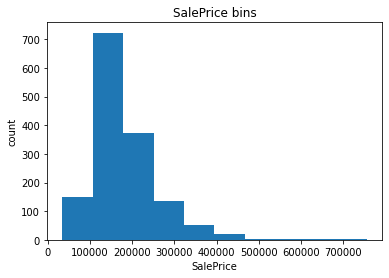

In [108]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["SalePrice"])

# set x/y labels and plot title
plt.pyplot.xlabel("SalePrice")
plt.pyplot.ylabel("count")
plt.pyplot.title("SalePrice bins")

We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

Since we want to include the minimum value of SalePrice, we want to set start_value = min(df["SalePrice"]).

Since we want to include the maximum value of horsepower, we want to set end_value = max(df["SalePrice"]).

Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.

We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.

In [109]:
bins = np.linspace(min(df["SalePrice"]), max(df["SalePrice"]), 4)
bins

array([ 34900.        , 274933.33333333, 514966.66666667, 755000.        ])

In [110]:
group_names = ['Low', 'Medium', 'High']

We use the function "cut" to determine what each value of df['SalePrice'] belongs to.

In [111]:
df['SalePrice-binned'] = pd.cut(df['SalePrice'], bins, labels=group_names, include_lowest=True )
df[['SalePrice','SalePrice-binned']].head(20)

,SalePrice,SalePrice-binned
0,208500.0,Low
1,181500.0,Low
2,223500.0,Low
3,140000.0,Low
4,250000.0,Low
5,143000.0,Low
6,307000.0,Medium
7,200000.0,Low
8,129900.0,Low
9,118000.0,Low


Now we can see the number of houses in each bin:

In [112]:
df["SalePrice-binned"].value_counts()

Low       1302
Medium     150
High         8
Name: SalePrice-binned, dtype: int64

Text(0.5, 1.0, 'SalePrice bins')

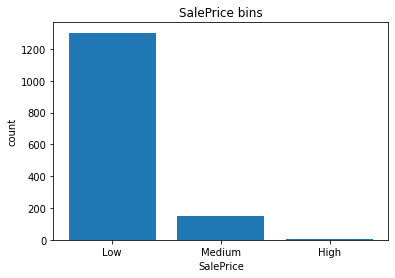

In [113]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["SalePrice-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("SalePrice")
plt.pyplot.ylabel("count")
plt.pyplot.title("SalePrice bins")


As you can see, the last column provides the bins for "SalePrice" based on 3 categories including "Low", "Medium", and "High". 


---
# ***We Made It! Wonderful!***


**Step 11: Analyzing Individual Feature Patterns using Visualization**


---
***NOTE:***
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.
- For instance, we can calculate the correlation between variables of type "int64" or "float64" using the method "corr":

In [114]:
df.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleCondition-Alloca,SaleCondition-Family,SaleCondition-Normal,SaleCondition-Partial,GarageType-2Types,GarageType-Attchd,GarageType-Basment,GarageType-BuiltIn,GarageType-CarPort,GarageType-Detchd
LotFrontage,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179281,0.215828,0.043340,0.122156,...,-0.018090,0.015818,-0.072074,0.124842,-0.003525,0.174217,0.041244,0.076699,0.021304,-0.243313
LotArea,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103957,0.214103,0.111170,-0.002618,...,0.008966,-0.010781,0.005711,0.022635,0.043358,0.090940,-0.000956,0.037552,0.009136,-0.126094
OverallQual,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410220,0.239666,-0.059119,0.308159,...,-0.044950,-0.025515,-0.143282,0.323295,-0.051079,0.242807,-0.025734,0.198299,-0.100601,-0.337227
OverallCond,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127775,-0.046231,0.040229,-0.136841,...,-0.033444,-0.023873,0.161642,-0.151659,-0.052473,-0.121648,-0.015926,-0.063721,-0.032867,0.183224
YearBuilt,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314726,0.249503,-0.049107,0.149040,...,-0.010104,-0.035785,-0.158427,0.343895,-0.038512,0.375284,-0.043454,0.201547,-0.056346,-0.487130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GarageType-Attchd,0.174217,0.090940,0.242807,-0.121648,0.375284,0.222555,0.121342,0.233721,0.044516,0.055263,...,-0.028917,-0.025070,-0.027497,0.095439,-0.087806,1.000000,-0.156955,-0.346175,-0.107651,-0.820894
GarageType-Basment,0.041244,-0.000956,-0.025734,-0.015926,-0.043454,-0.039664,-0.010210,-0.005503,0.017635,-0.039097,...,0.123422,-0.013533,-0.056547,-0.013537,-0.007376,-0.156955,1.000000,-0.029081,-0.009043,-0.068961
GarageType-BuiltIn,0.076699,0.037552,0.198299,-0.063721,0.201547,0.184043,0.116660,-0.069965,-0.062664,0.063465,...,-0.023055,-0.005088,-0.054061,0.117935,-0.016269,-0.346175,-0.029081,1.000000,-0.019946,-0.152097
GarageType-CarPort,0.021304,0.009136,-0.100601,-0.032867,-0.056346,-0.065208,-0.036365,-0.014908,0.064902,-0.070470,...,0.089753,-0.009282,-0.031583,-0.024099,-0.005059,-0.107651,-0.009043,-0.019946,1.000000,-0.047298


In [115]:
df[['BedroomAbvGr', 'YearBuilt', 'YearRemodAdd', 'SalePrice']].corr()

,BedroomAbvGr,YearBuilt,YearRemodAdd,SalePrice
BedroomAbvGr,1.000000,-0.070651,-0.040581,0.168213
YearBuilt,-0.070651,1.000000,0.592855,0.522897
YearRemodAdd,-0.040581,0.592855,1.000000,0.507101
SalePrice,0.168213,0.522897,0.507101,1.000000


We can use the Pandas method corr() to find the feature other than SalePrice that is most correlated with SalePrice.

In [116]:
df.corr()['SalePrice'].sort_values()

BsmtQual-TA         -0.498545
GarageType-Detchd   -0.354141
Foundation-CBlock   -0.343263
CentralAir-N        -0.251328
SaleType-WD         -0.242598
                       ...   
GarageArea           0.623431
GarageCars           0.640409
GrLivArea            0.708624
OverallQual          0.790982
SalePrice            1.000000
Name: SalePrice, Length: 126, dtype: float64

**Continuous Numerical Variables:**
They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.
We can visualize these variables by using scatterplots with fitted lines.
In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.

There are different linear relationships:

- Positive Linear Relationship 
- Inverse/negative relationship
- Weak Linear Relationship

Let's find the scatterplot of "**YearBuilt**" and "**SalePrice**".

# - **First:** we need to examine the **correlation** between 'YearBuilt' and 'SalePrice'.

In [117]:
df[["YearBuilt", "SalePrice"]].corr()

,YearBuilt,SalePrice
YearBuilt,1.000000,0.522897
SalePrice,0.522897,1.000000


It's approximately 0.52.

**YearBuilt** is a potential predictor variable of Saleprice. 
# - **Second**: we must find the **scatterplot** of "YearBuilt" and "Saleprice".

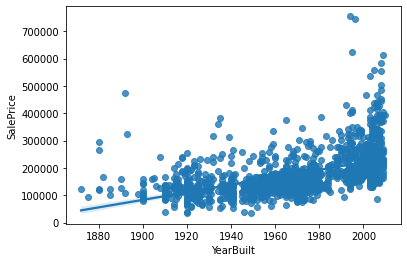

In [118]:
sns.regplot(x="YearBuilt", y="SalePrice", data=df)

As we can see, when YearBuilt goes up, the price goes up as well. This indicates an positive relationship between these two variables. 

**Categorical Variables**

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

Let's look at the relationship between **"Heating"** and **"Saleprice"**.

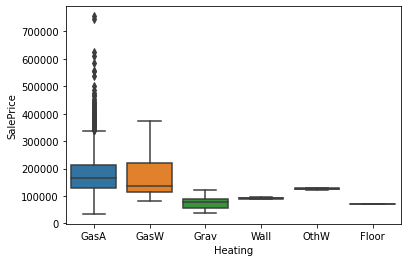

In [119]:
sns.boxplot(x="Heating", y="SalePrice", data=df)

We see that the distributions of SalePrice between the different Heating categories have a significant overlap, so Heating would not be a good predictor of price. Let's examine engine **"HouseStyle"** and **"SalrPrice"**:

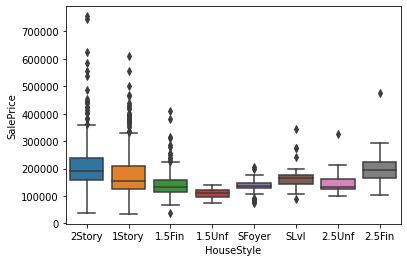

In [120]:
sns.boxplot(x="HouseStyle", y="SalePrice", data=df)

**Step 12: Descriptive Statistical Analysis**
As I maintained in the fifth stage describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

- The count of that variable
- The mean
- The standard deviation (std)
- The minimum value
- The IQR (Interquartile Range: 25%, 50% and 75%)
- The maximum value


 **Grouping**

The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

For example, let's group by the variable "HouseStyle". We see that there are 8 different categories of HouseStyle.

In [121]:
df['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

If we want to know, on average, which type of house style is most valuable, we can group "HouseStyle" and then average them.


In [122]:
df_group_one = df[['HouseStyle','SalePrice']]

In [123]:
# grouping results
df_group_one = df_group_one.groupby(['HouseStyle'],as_index=False).mean()
df_group_one

,HouseStyle,SalePrice
0,1.5Fin,143116.740260
1,1.5Unf,110150.000000
2,1Story,175985.477961
3,2.5Fin,220000.000000
4,2.5Unf,157354.545455
5,2Story,210051.764045
6,SFoyer,135074.486486
7,SLvl,166703.384615


Let's do it by multiple variables. For example, let's group by both 'Heating' and 'HouseStyle'. This groups the dataframe by the unique combination of 'Heating' and 'HouseStyle'. We can store the results in the variable 'grouped_test1'.

In [124]:
df_gptest = df[['Heating','HouseStyle','SalePrice']]
grouped_test1 = df_gptest.groupby(['Heating','HouseStyle'],as_index=False).mean()
grouped_test1

,Heating,HouseStyle,SalePrice
0,Floor,1Story,72500.000000
1,GasA,1.5Fin,143692.853147
2,GasA,1.5Unf,110383.333333
3,GasA,1Story,176942.737063
4,GasA,2.5Fin,220000.000000
5,GasA,2.5Unf,163062.500000
6,GasA,2Story,210548.990909
7,GasA,SFoyer,135074.486486
8,GasA,SLvl,166703.384615
9,GasW,1.5Fin,171000.000000


**Step 13: Correlation and Causation**


***Pearson Correlation***

The Pearson Correlation measures the linear dependence between two variables X and Y.

*Do not forget:*

- 1: Perfect positive linear correlation.
- 0: No linear correlation, the two variables most likely do not affect each other.
- -1: Perfect negative linear correlation.

In [125]:
df.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleCondition-Alloca,SaleCondition-Family,SaleCondition-Normal,SaleCondition-Partial,GarageType-2Types,GarageType-Attchd,GarageType-Basment,GarageType-BuiltIn,GarageType-CarPort,GarageType-Detchd
LotFrontage,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179281,0.215828,0.043340,0.122156,...,-0.018090,0.015818,-0.072074,0.124842,-0.003525,0.174217,0.041244,0.076699,0.021304,-0.243313
LotArea,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103957,0.214103,0.111170,-0.002618,...,0.008966,-0.010781,0.005711,0.022635,0.043358,0.090940,-0.000956,0.037552,0.009136,-0.126094
OverallQual,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410220,0.239666,-0.059119,0.308159,...,-0.044950,-0.025515,-0.143282,0.323295,-0.051079,0.242807,-0.025734,0.198299,-0.100601,-0.337227
OverallCond,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127775,-0.046231,0.040229,-0.136841,...,-0.033444,-0.023873,0.161642,-0.151659,-0.052473,-0.121648,-0.015926,-0.063721,-0.032867,0.183224
YearBuilt,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314726,0.249503,-0.049107,0.149040,...,-0.010104,-0.035785,-0.158427,0.343895,-0.038512,0.375284,-0.043454,0.201547,-0.056346,-0.487130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GarageType-Attchd,0.174217,0.090940,0.242807,-0.121648,0.375284,0.222555,0.121342,0.233721,0.044516,0.055263,...,-0.028917,-0.025070,-0.027497,0.095439,-0.087806,1.000000,-0.156955,-0.346175,-0.107651,-0.820894
GarageType-Basment,0.041244,-0.000956,-0.025734,-0.015926,-0.043454,-0.039664,-0.010210,-0.005503,0.017635,-0.039097,...,0.123422,-0.013533,-0.056547,-0.013537,-0.007376,-0.156955,1.000000,-0.029081,-0.009043,-0.068961
GarageType-BuiltIn,0.076699,0.037552,0.198299,-0.063721,0.201547,0.184043,0.116660,-0.069965,-0.062664,0.063465,...,-0.023055,-0.005088,-0.054061,0.117935,-0.016269,-0.346175,-0.029081,1.000000,-0.019946,-0.152097
GarageType-CarPort,0.021304,0.009136,-0.100601,-0.032867,-0.056346,-0.065208,-0.036365,-0.014908,0.064902,-0.070470,...,0.089753,-0.009282,-0.031583,-0.024099,-0.005059,-0.107651,-0.009043,-0.019946,1.000000,-0.047298


P-value
The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.



- The p-value is  < 0.001: we say there is strong evidence that the correlation is significant. 
- The p-value is  < 0.05: there is moderate evidence that the correlation is significant.
- The p-value is  < 0.1: there is weak evidence that the correlation is significant.
- The p-value is  > 0.1: there is no evidence that the correlation is significant.


We can obtain this information using "stats" module in the **"scipy"** library.

In [126]:
#BedroomAbvGr vs. SalePrice
pearson_coef, p_value = stats.pearsonr(df['BedroomAbvGr'], df['SalePrice'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.16821315430074  with a P-value of P = 9.927497326186164e-11


Conclusion:
Since the p-value is  < 0.001, the correlation between BedroomAbvGr and SalePrice is statistically significant, and the linear relationship isn't extremely strong (~0.168).

---



---
NOTE: We can **APPLY** the process for each **VARIABLES**.

**Step 14: ANOVA (Analysis of Variance)**

A statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

- F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

- P-value: P-value tells how statistically significant our calculated score value is.

If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

**NOTE: Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.**



For instans to see if different types of 'HouseStyle' impact 'SalePrice', we first group the data.

In [127]:
grouped_test2=df_gptest[['HouseStyle', 'SalePrice']].groupby(['HouseStyle'])
grouped_test2.head(2)

,HouseStyle,SalePrice
0,2Story,208500.0
1,1Story,181500.0
2,2Story,223500.0
5,1.5Fin,143000.0
6,1Story,307000.0
8,1.5Fin,129900.0
9,1.5Unf,118000.0
15,1.5Unf,132000.0
42,SFoyer,144000.0
54,SLvl,130000.0


In [128]:
df_gptest

,Heating,HouseStyle,SalePrice
0,GasA,2Story,208500.0
1,GasA,1Story,181500.0
2,GasA,2Story,223500.0
3,GasA,2Story,140000.0
4,GasA,2Story,250000.0
...,...,...,...
1455,GasA,2Story,175000.0
1456,GasA,1Story,210000.0
1457,GasA,2Story,266500.0
1458,GasA,1Story,142125.0


We can obtain the values of the method group using the method "get_group".

In [129]:
grouped_test2.get_group('1Story')['SalePrice']

1       181500.0
6       307000.0
10      129500.0
12      144000.0
13      279500.0
          ...   
1453     84500.0
1454    185000.0
1456    210000.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 726, dtype: float64

We can use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

In [130]:
df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [131]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('1Story')['SalePrice'],
                              grouped_test2.get_group('2Story')['SalePrice'],
                              grouped_test2.get_group('SFoyer')['SalePrice'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 33.08522878236333 , P = 1.0278070377479635e-14


**Step 15: Model Development**


1.   Simple Linear Regression
2.   Multiple Linear Regression
3.   Polynomial Regression and Pipelines



We will develop several models that will predict the price of the house using the variables or features.

***1- Simple Linear Regression***

It is a method to help us understand the relationship between two variables:
*   The predictor/independent variable (X)
*   The response/dependent variable (that we want to predict)(Y)

The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.



> Yhat =  a + bX



*   a refers to the intercept of the regression line, in other words: the value of Y when X is 0.
*   b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit.





In [132]:
#loading the modules for linear regression
from sklearn.linear_model import LinearRegression

In [133]:
#Createing the linear regression object
lm = LinearRegression()
lm

LinearRegression()

EXAMPLE:
- How could "YearBuilt" help us predict Housing price?

In [134]:
X = df[['YearBuilt']]
Y = df['SalePrice']

In [135]:
lm.fit(X,Y)

LinearRegression()

In [136]:
Yhat=lm.predict(X)
Yhat[0:5]

array([224564.81054524, 187429.72691094, 221814.06360936, 103531.94536679,
       220438.69014143])

In [137]:
#The value of the intercept (a)
lm.intercept_

-2530308.2457323573

In [138]:
#The value of the slope (b)
lm.coef_

array([1375.37346794])

In [139]:
#The equation of the predicted line. 
Yhat =-2530308.24 + 1375.37 * X
             #OR
SalePrice = -2530308.24 + 1375.37 * df['YearBuilt']

**Model Evaluation Using Visualization**


> We need to evaluate our models and choose the best one by using a visualization.


In [140]:
#Note: The visualization package, seaborn:
#import seaborn as sns
#%matplotlib inline 


A way to visualize our model is by using **regression plots** (when it comes to simple linear regression,).

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).


In [141]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline 

(0.0, 791154.2398731733)

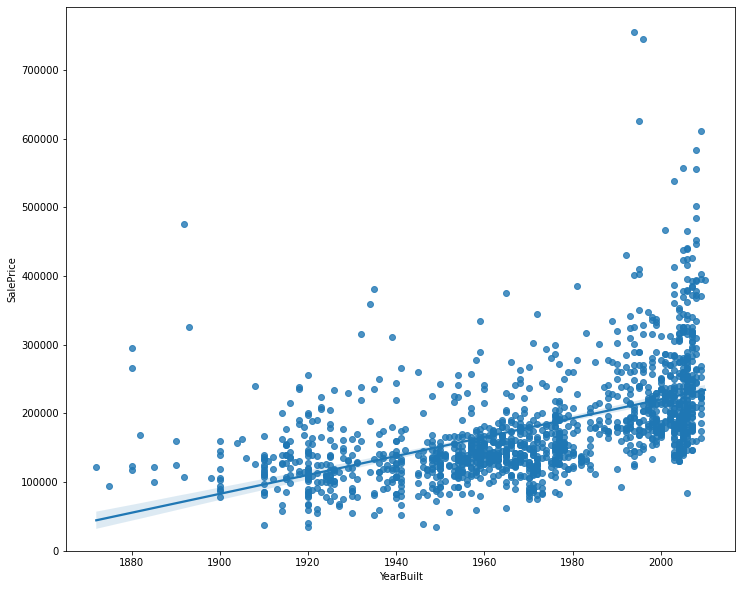

In [142]:
#Let's visualize YearBuilt as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="YearBuilt", y="SalePrice", data=df)
plt.ylim(0,)

We can see from this plot that price is positively correlated to Year Built since the regression slope is positive.

As the data is too far off from the line, this linear model might not be the best model for this data.

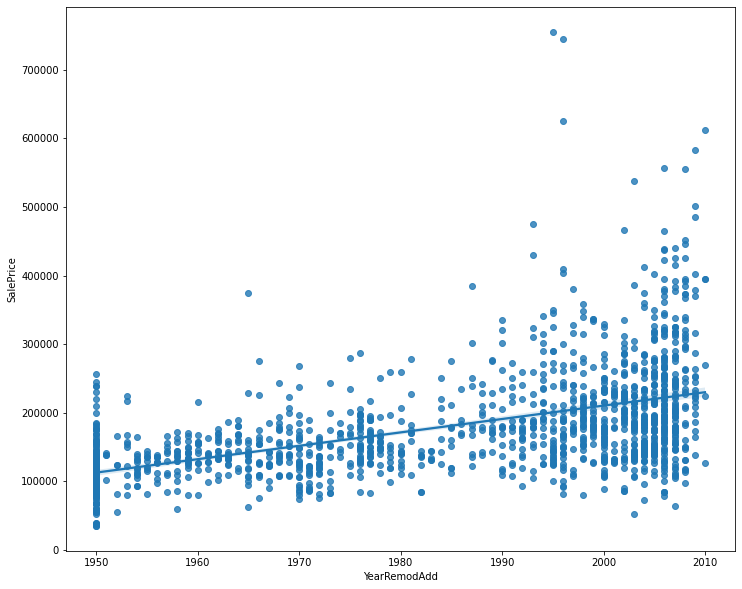

In [143]:
#Let's visualize YearRemodAdd as potential predictor variable of price:
plt.figure(figsize=(width, height))
sns.regplot(x="YearRemodAdd", y="SalePrice", data=df)

Given the regression plots above, is "YearRemodAdd" or "YearBuilt" more strongly correlated with "SalePrice"?
 

> We can apply the method ".corr()" to verify our answer.



In [144]:
df[["YearRemodAdd","YearBuilt","SalePrice"]].corr()

,YearRemodAdd,YearBuilt,SalePrice
YearRemodAdd,1.000000,0.592855,0.507101
YearBuilt,0.592855,1.000000,0.522897
SalePrice,0.507101,0.522897,1.000000


The variables "YearRemodAdd" and "YearBuilt" almost have same correlation with "SalePrice".

# **Residual Plot**

 A good way to visualize the variance of the data is to use a residual plot. The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.
Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


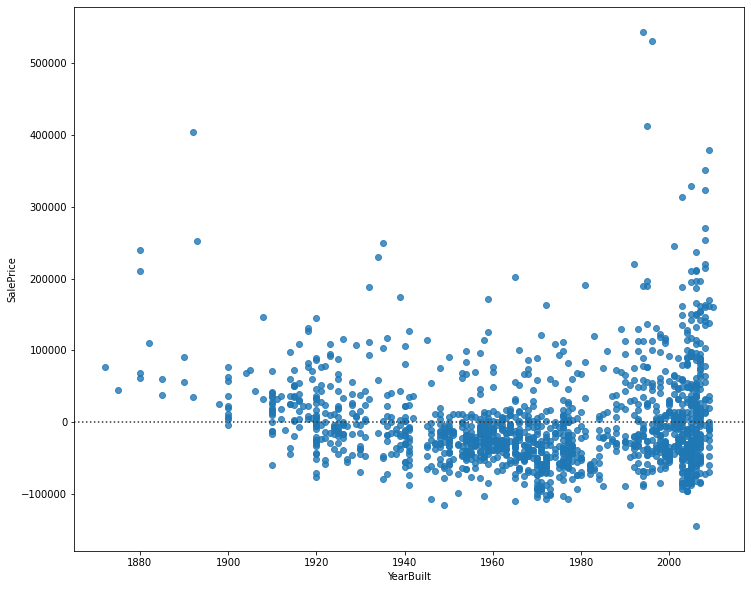

In [145]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['YearBuilt'], df['SalePrice'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

**2- Multiple Linear Regression**

If we want to use more variables in our model to predict housing price, we can use Multiple Linear Regression.  We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:


>  Yhat= a+b_1X_1 + b_2X_2 + b_3X_3 + b_4X_4


- Let's develop a model using these variables as the predictor variables.

In [146]:
Z = df[['YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'FullBath']]
lm.fit(Z, df['SalePrice'])
         #OR
lm2 = LinearRegression()
lm2.fit(df[['YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'FullBath']],df['SalePrice'])


LinearRegression()

In [147]:
lm.intercept_

-2696637.001878026

In [148]:
lm.coef_

array([5.99851808e+02, 8.12170741e+02, 7.43671820e+00, 5.03628702e+04])

In [149]:
#The linear function we get in this example:
# Yhat= a+b_1X_1 + b_2X_2 + b_3X_3 + b_4X_4
#'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'FullBath'
Yhat= -2696637 + 599.8 *df['YearBuilt'] + 812.17*df['YearRemodAdd'] + 7.43 *df['BsmtUnfSF'] + 50362.87 *df['FullBath']

**- Visualizing a model for Multiple Linear Regression**

This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.



In [150]:
#First, let's make a prediction:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


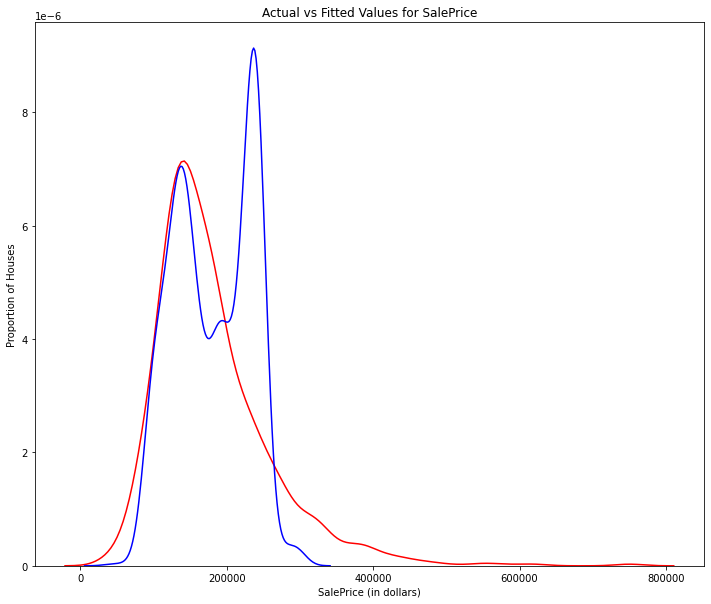

In [151]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for SalePrice')
plt.xlabel('SalePrice (in dollars)')
plt.ylabel('Proportion of Houses')

plt.show()
plt.close()

We can see that the fitted values are not exactly reasonably close to the actual values since the two distributions overlap a bit. There is definitely some room for improvement.

**3. Polynomial Regression and Pipelines**

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:



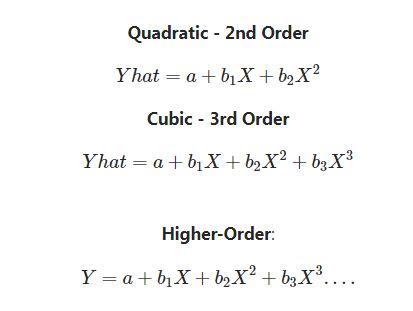

We saw earlier that a linear model did not provide the best fit while using "YearBuilt" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.


In [152]:
#Using the following function to plot the data:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(1800, 2021, 1000)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for SalePrice ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Houses')

    plt.show()
    plt.close()

In [153]:
x = df['YearBuilt']
y = df['SalePrice']

In [154]:
#fitting the polynomial using the function polyfit
#Then use the function poly1d to display the polynomial function.
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

         3         2
0.08929 x - 501.7 x + 9.387e+05 x - 5.847e+08


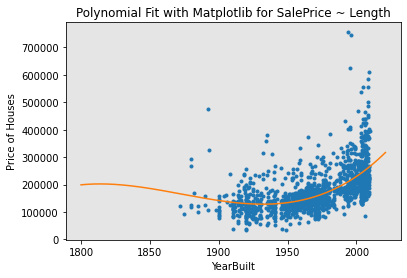

In [155]:
#Plotting the function:
PlotPolly(p, x, y, 'YearBuilt')

In [156]:
np.polyfit(x, y, 3)

array([ 8.92851053e-02, -5.01672132e+02,  9.38656738e+05, -5.84675974e+08])

We can already see from plotting that this **polynomial** model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.



The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:

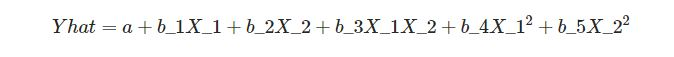

We can perform a polynomial transform on **multiple features**. 

In [157]:
#Importing the module:
from sklearn.preprocessing import PolynomialFeatures

We create a PolynomialFeatures object of **degree 2:**

In [158]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [159]:
Z_pr=pr.fit_transform(Z)

In [160]:
#In the original data, there are 1460 samples and 4 features.
Z.shape

(1460, 4)

In [161]:
#After the transformation, there are 1460 samples and 15 features.
Z_pr.shape

(1460, 15)

**Pipeline**


> Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.



In [162]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [163]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

We input the list as an argument to the pipeline constructor:

In [164]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [165]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

In [166]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([249315.4998091 , 178311.26375986, 235922.73384146, 115786.07127558])

In [167]:
#EXAMPLE: Create a pipeline that standardizes the data,
#Then produce a prediction using a linear regression model using the features Z and target y:

Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([233485.41264407, 196357.32404826, 233585.56625401, 106434.26899658,
       231777.82918229, 169987.10070244, 236951.53787337, 191615.55956275,
       153215.28116346, 101612.61028867])

**Step 16: Measures for In-Sample Evaluation**

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:



> **R^2 / R-squared**
- R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

>**Mean Squared Error (MSE)**
- The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).





R-squared



Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

**Model 1: Simple Linear Regression**
- calculate the R^2:

In [168]:
#YearBuilt_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.27342162073249154


We can say that ~27.342% of the variation of the SalePrice is explained by this simple linear model "YearBuilt_fit".

>Let's calculate the MSE:

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [169]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [224564.81054524 187429.72691094 221814.06360936 103531.94536679]


>We can import the function mean_squared_error from the module metrics:

In [170]:
from sklearn.metrics import mean_squared_error

>We can compare the predicted results with the actual results:

In [171]:
mse = mean_squared_error(df['SalePrice'], Yhat)
print('The mean square error of SalePrice and predicted value is: ', mse)

The mean square error of SalePrice and predicted value is:  4582376228.725916


**Model 2: Multiple Linear Regression**
>Calculate the R^2:

In [172]:
# fit the model 
lm.fit(Z, df['SalePrice'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['SalePrice']))

The R-square is:  0.4309674166081747


We can say that ~43.096 % of the variation of SalePrice is explained by this multiple linear regression "multi_fit".

>We cam calculate the MSE.



In [173]:
#We produce a prediction:
Y_predict_multifit = lm.predict(Z)

In [174]:
#We compare the predicted results with the actual results:
print('The mean square error of SalePrice and predicted value using multifit is: ', \
      mean_squared_error(df['SalePrice'], Y_predict_multifit))

The mean square error of SalePrice and predicted value using multifit is:  3588768201.6273866


**Model 3: Polynomial Fit**
>Calculate the R^2.

We must import the function r2_score from the module metrics as we are using a different function.

In [175]:
from sklearn.metrics import r2_score

In [176]:
#We apply the function to get the value of R^2:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.3498297491085013


We can say that ~34.982 % of the variation of price is explained by this polynomial fit.

**MSE**
> Calculate the MSE:

In [177]:
mean_squared_error(df['SalePrice'], p(x))

4100486316.856194

**Step 17: Prediction**
>NOW, we trained the model using the method fit.  In this step, we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [178]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [179]:
#Create a new input:
new_input=np.arange(1850, 2021, 1).reshape(-1, 1)

In [180]:
#Fit the model:
lm.fit(X, Y)
lm

LinearRegression()

In [181]:
#Produce a prediction:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([14132.66995089, 15508.04341883, 16883.41688677, 18258.7903547 ,
       19634.16382264])

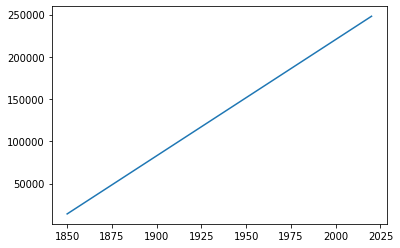

In [182]:
#We can plot the data:
plt.plot(new_input, yhat)
plt.show()

**Step 18: Determining a Good Model Fit**

We have visualized the different models, and generated the R-squared and MSE values for the fits.

>**What is a good R-squared value?**
When comparing models, the model with the higher R-squared value is a better fit for the data.

>**What is a good MSE?**
When comparing models, the model with the smallest MSE value is a better fit for the data.

>**Simple Linear Regression:** Using YearBuilt as a Predictor Variable of SalePrice.

- R-squared: 0.27342162073249154
- MSE: 4.58 x10^7

>**Multiple Linear Regression:** Using 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', and 'FullBath' as Predictor Variables of SalePrice.

- R-squared: 0.4309674166081747
- MSE: 3.58 x10^7

>**Polynomial Fit:** Using YearBuilt as a Predictor Variable of SalePrice.

- R-squared: 0.3498297491085013
- MSE: 4.10 x 10^7


# **Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)**

>**We should always check the MSE and R^2.**

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

- MSE: The MSE of SLR is 4.58 x10^7 while MLR has an MSE of 3.58 x10^7. The MSE of MLR is much smaller.

- R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~ 0.273) is very small compared to the R-squared for the MLR (~ 0.430).



>This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.



# **Simple Linear Model (SLR) vs. Polynomial Fit**

- MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
- R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.

>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "SalePrice" with "YearBuilt" as a predictor variable.

# **Multiple Linear Regression (MLR) vs. Polynomial Fit**


- MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
- R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

**Conclusion**
Comparing these three models, we conclude that the MLR model is the best model to be able to predict SalePrice from our dataset.  We know that more than one of those variables are potential predictors of the final Housing Price.

**Step 19: Model Evaluation**

1.   Training and Testing
2.   Model Selection
3.   Ridge Regression
4.   Grid Search



We must only use numeric data:

In [183]:
df=df._get_numeric_data()
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleCondition-Alloca,SaleCondition-Family,SaleCondition-Normal,SaleCondition-Partial,GarageType-2Types,GarageType-Attchd,GarageType-Basment,GarageType-BuiltIn,GarageType-CarPort,GarageType-Detchd
0,65.0,8450,7,5,2003,2003,196,706,0,150,...,0,0,1,0,0,1,0,0,0,0
1,80.0,9600,6,8,1976,1976,0,978,0,284,...,0,0,1,0,0,1,0,0,0,0
2,68.0,11250,7,5,2001,2002,162,486,0,434,...,0,0,1,0,0,1,0,0,0,0
3,60.0,9550,7,5,1915,1970,0,216,0,540,...,0,0,0,0,0,0,0,0,0,1
4,84.0,14260,8,5,2000,2000,350,655,0,490,...,0,0,1,0,0,1,0,0,0,0


In [184]:
#Libraries for plotting:
from ipywidgets import interact, interactive, fixed, interact_manual

In [185]:
#Functions for Plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('SalePrice (in dollars)')
    plt.ylabel('Proportion of Houses')

    plt.show()
    plt.close()

In [186]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([0, 8e5])
    plt.ylabel('SalePrice')
    plt.legend()

**1- Training and Testing**
>An important step in testing our model is to split our data into training and testing data. We will place the target data SalePrice in a separate dataframe y_data

In [187]:
y_data = df['SalePrice']

We need to drop SalePrice data in dataframe x_data:

In [188]:
x_data=df.drop('SalePrice',axis=1)

We must randomly split our data into training and testing data using the function train_test_split.

In [189]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 146
number of training samples: 1314


**Note:** The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total datase

Example: We can use the function "train_test_split" to split up the dataset such that 35% of the data samples will be utilized for testing. (We also can set the parameter "random_state" equal to zero)

In [190]:
#x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.35, random_state=0)


#print("number of test samples :", x_test.shape[0])
#print("number of training samples:",x_train.shape[0])

NOW we must import LinearRegression from the module linear_model.

In [191]:
from sklearn.linear_model import LinearRegression

In [192]:
#We create a Linear Regression object:
lre=LinearRegression()

In [193]:
#We fit the model using the feature "YearRemodAdd":
lre.fit(x_train[['YearRemodAdd']], y_train)

LinearRegression()

In [194]:
#Let's calculate the R^2 on the test data:
lre.score(x_test[['YearRemodAdd']], y_test)

0.25591681833697233

We can see the R^2 is smaller using the test data compared to the training data.

In [195]:
lre.score(x_train[['YearRemodAdd']], y_train)

0.2572742592040381

>Sometimes we do not have sufficient testing data, and we may want to perform **cross-validation**.

**Cross-Validation Score**


In [196]:
from sklearn.model_selection import cross_val_score

We input the object, the feature ("YearRemodAdd"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.

In [197]:
Rcross = cross_val_score(lre, x_data[['YearRemodAdd']], y_data, cv=4)

The default scoring is R^2. Each element in the array has the average R^2 value for the fold:

In [198]:
Rcross

array([0.27699178, 0.26717565, 0.26568863, 0.20589074])

We can calculate the average and standard deviation of our estimate:

In [199]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.2539366999659076 and the standard deviation is 0.028077253546213536


We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'

In [200]:
-1 * cross_val_score(lre,x_data[['YearRemodAdd']], y_data,cv=4,scoring='neg_mean_squared_error')

array([4.19236340e+09, 5.56015439e+09, 4.14459753e+09, 4.90113517e+09])

In [201]:
#We can alculate the average R^2 using two folds,
#Then find the average R^2 for the second fold utilizing the "YearRemodAdd" feature:

#Rc=cross_val_score(lre,x_data[['YearRemodAdd']], y_data,cv=2)
#Rc.mean()

We can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training.

In [202]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature "YearRemodAdd", and the target data y_data. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:

In [203]:
yhat = cross_val_predict(lre,x_data[['YearRemodAdd']], y_data,cv=4)
yhat[0:5]

array([215276.17911986, 162983.89069532, 213339.42769672, 151363.38215653,
       209465.92485046])

**2- Model Selection**
>It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well our model performs in the real world. One reason for this is overfitting.

>It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

>We need to create Multiple Linear Regression objects and train the model using 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', and 'FullBath' as features.

In [204]:
lr = LinearRegression()
lr.fit(x_train[[ 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'FullBath']], y_train)

LinearRegression()

In [205]:
#Prediction using training data:
yhat_train = lr.predict(x_train[['YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'FullBath']])
yhat_train[0:5]


array([104677.85037977, 240088.16111195, 231230.6498963 , 127934.09033156,
       230562.92630718])

In [206]:
#Prediction using test data:
yhat_test = lr.predict(x_test[['YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'FullBath']])
yhat_test[0:5]

array([232905.0826937 , 193907.66017809, 133090.96053575, 133769.56813621,
       120317.34472269])

NOW we can perform some model evaluation using our training and testing data separately. 

In [207]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


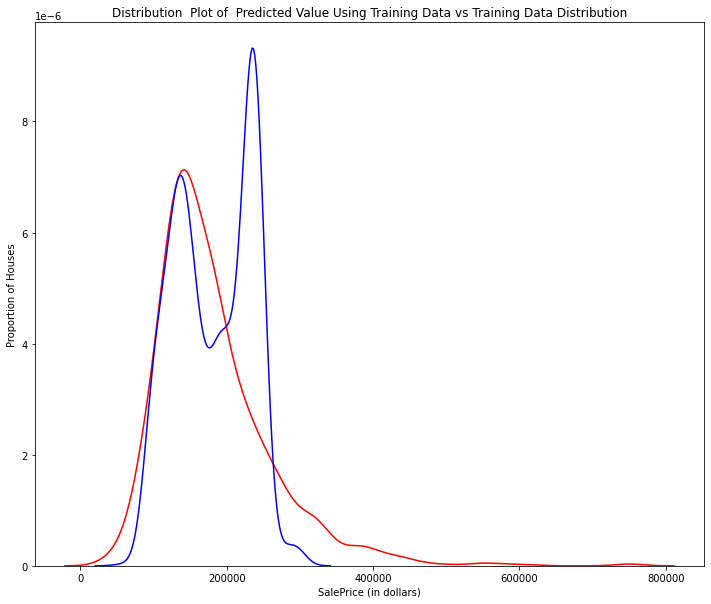

In [208]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

>Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.



So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


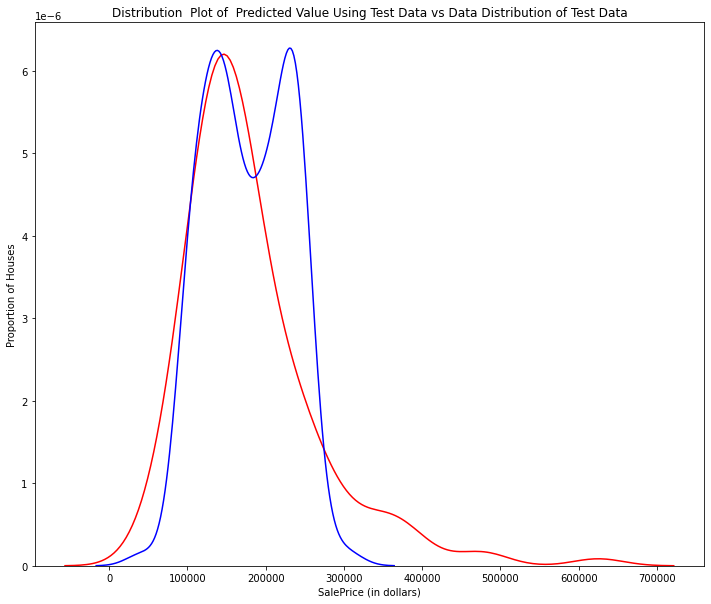

In [209]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

>Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 2 is much better at fitting the data. This difference in Figure 1 is apparent in the range of 200000 to 300000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [210]:
from sklearn.preprocessing import PolynomialFeatures

# **JUST A NOTE: Overfitting**

>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing our model using the test set, our model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. 



Let's use 55 percent of the data for training and the rest for testing:

In [211]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)


We will perform a degree 5 polynomial transformation on the feature 'YearBuilt'.

In [212]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['YearBuilt']])
x_test_pr = pr.fit_transform(x_test[['YearBuilt']])
pr

PolynomialFeatures(degree=5)

Let's create a Linear Regression model "poly" and train it.

In [213]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "yhat".

In [214]:
yhat = poly.predict(x_test_pr)
yhat[0:8]

array([139722.02514677, 129926.59248774, 134102.73528319, 168833.0183199 ,
       157918.56774967, 137141.09488433, 256220.29581188, 129086.87143093])

Let's take the first five predicted values and compare it to the actual targets.

In [215]:
print("Predicted values:", yhat[0:8])
print("True values:", y_test[0:8].values)

Predicted values: [139722.02514677 129926.59248774 134102.73528319 168833.0183199
 157918.56774967 137141.09488433 256220.29581188 129086.87143093]
True values: [200624. 133000. 110000. 192000.  88000.  85000. 282922. 141000.]


We will use the function "PollyPlot" to display the training data, testing data, and the predicted function.

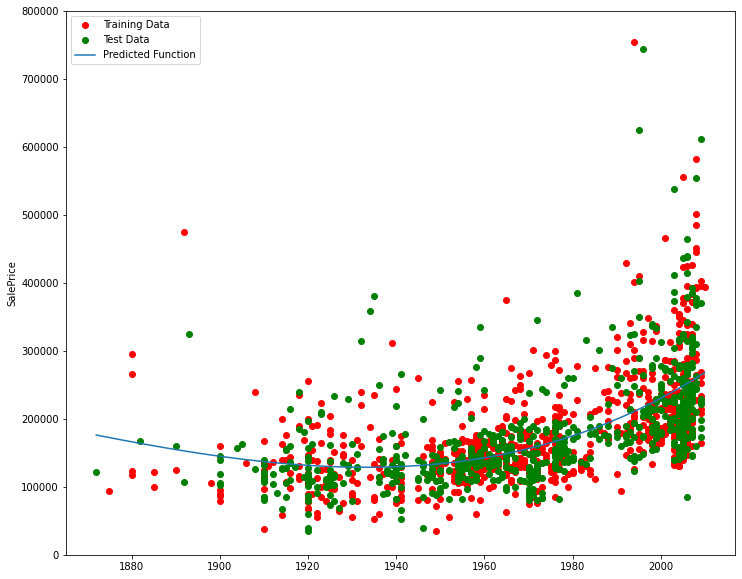

In [216]:
PollyPlot(x_train[['YearBuilt']], x_test[['YearBuilt']], y_train, y_test, poly,pr)

>Figure 3: A polynomial regression model where **red dots** represent **training data**,** green dots** represent **test data**, and the **blue line** represents the **model prediction**.



We see that the estimated function appears to track the data but year build around 1990, the function begins to diverge from the data points.



In [217]:
#R^2 of the training data:
poly.score(x_train_pr, y_train)

0.35119396082561105

In [218]:
#R^2 of the test data:
poly.score(x_test_pr, y_test)

0.34778915581334535

We see the R^2 for the training data is 0.3511 while the R^2 on the test data was 0.3477. The lower the R^2, the worse the model. 



>Note: A negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:

Text(3, 0.75, 'Maximum R^2 ')

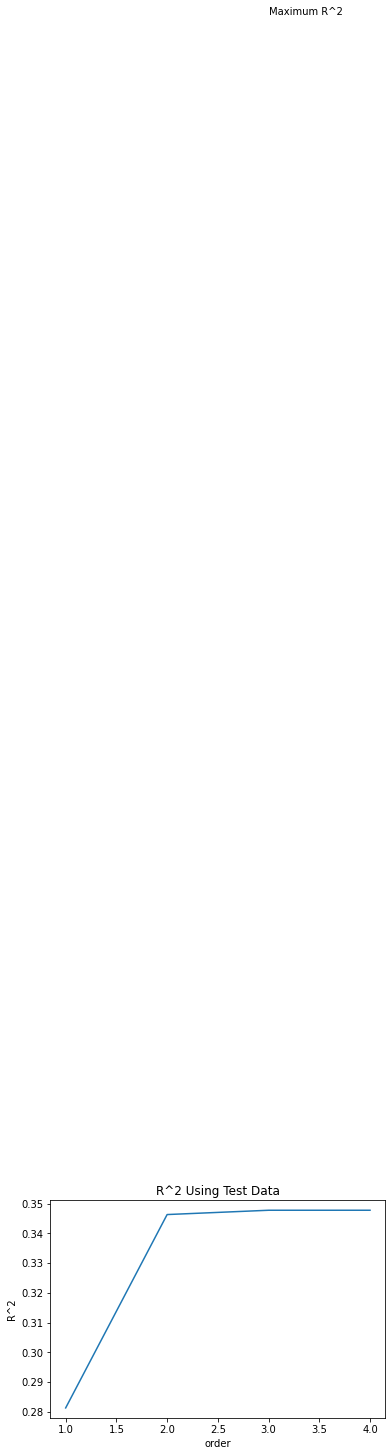

In [219]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['YearBuilt']])
    
    x_test_pr = pr.fit_transform(x_test[['YearBuilt']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

>We see the R^2 gradually increases until an order two polynomial is used. Then, the R^2 remains stable at an order two polynomial.

We can use the following function in the next section. 

In [220]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['YearBuilt']])
    x_test_pr = pr.fit_transform(x_test[['YearBuilt']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['YearBuilt']], x_test[['YearBuilt']], y_train,y_test, poly, pr)

**3- Ridge Regression**

As our test data has been as validation data, we can see how the parameter alpha changes the model. 
We can perform a degree two polynomial transformation on our data.

In [221]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'FullBath']])
x_test_pr=pr.fit_transform(x_test[['YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'FullBath']])

In [222]:
#Let's import Ridge from the module linear models.
from sklearn.linear_model import Ridge

In [223]:
#Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1
RigeModel=Ridge(alpha=1)

In [224]:
#Like regular regression, you can fit the model using the method fit.
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [225]:
#We can obtain a prediction:
yhat = RigeModel.predict(x_test_pr)

In [226]:
#Let's compare the first five predicted samples to our test set:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [294853.0998363  106779.49914391 108192.3728727  185426.29361917]
test set : [200624. 133000. 110000. 192000.]


>NOTE: We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.

In [227]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:08<00:00, 116.80it/s, Test Score=0.43, Train Score=0.456]


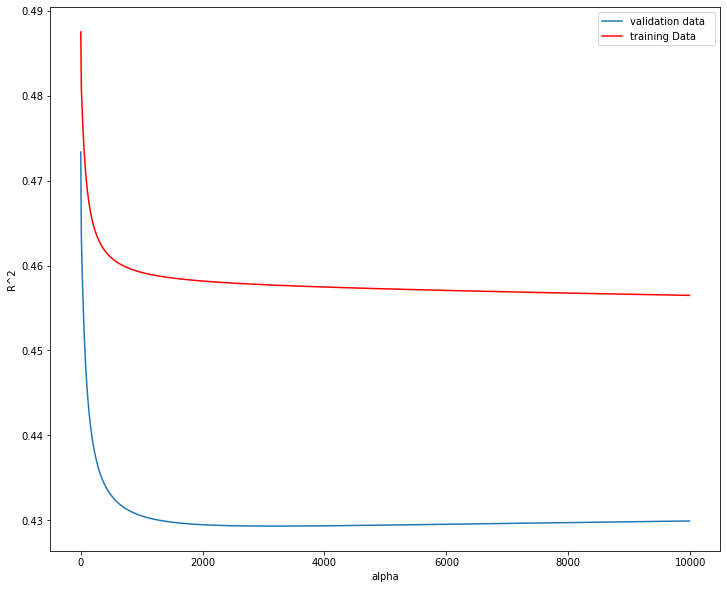

In [228]:
#We can plot out the value of R^2 for different alphas:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Figure 4: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.

Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

**4- Grid Search**

The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

Let's import GridSearchCV from the module model_selection.

In [229]:
from sklearn.model_selection import GridSearchCV

In [230]:
#We create a dictionary of parameter values:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [231]:
#Create a Ridge regression object:
RR=Ridge()
RR

Ridge()

In [232]:
#Create a ridge grid search object:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [233]:
#Fit the model
Grid1.fit(x_data[['YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'FullBath']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [234]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1)

We now test our model on the test data:

In [235]:
BestRR.score(x_test[['YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'FullBath']], y_test)

0.425099061498757